In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

In [8]:
df = pd.read_csv("/Users/olegyarygin/Projects/Data-Science/Data/uk-used-car/bmw.csv")

In [9]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [10]:
train, test = train_test_split(df, random_state=42, train_size = 0.6) # random_state чтобы эксперимент навсегда сохранился

In [11]:
val, test = train_test_split(test, random_state=42, train_size = 0.5) # random_state чтобы эксперимент навсегда сохранился

In [86]:
# Все фичи 

x = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax','mpg', 'engineSize']

cat_features = ["model", "transmission", "fuelType"]

y = ['price']


In [87]:
model = CatBoostRegressor(cat_features=cat_features, 
                          eval_metric="MAPE",
                          random_seed=42,
                          early_stopping_rounds=200,
                          verbose=100) # Гипер параметры 

In [88]:
model.fit(train[x], train[y],eval_set = (val[x], val[y])) # Запуск обучения

Learning rate set to 0.068263
0:	learn: 0.4607438	test: 0.4563750	best: 0.4563750 (0)	total: 12.5ms	remaining: 12.5s
100:	learn: 0.0904302	test: 0.0896388	best: 0.0896388 (100)	total: 238ms	remaining: 2.12s
200:	learn: 0.0781784	test: 0.0803125	best: 0.0803125 (200)	total: 449ms	remaining: 1.78s
300:	learn: 0.0729925	test: 0.0764506	best: 0.0764506 (300)	total: 665ms	remaining: 1.54s
400:	learn: 0.0695552	test: 0.0744676	best: 0.0744553 (399)	total: 884ms	remaining: 1.32s
500:	learn: 0.0670683	test: 0.0732827	best: 0.0732827 (500)	total: 1.11s	remaining: 1.1s
600:	learn: 0.0652835	test: 0.0726170	best: 0.0726128 (597)	total: 1.32s	remaining: 879ms
700:	learn: 0.0636320	test: 0.0720622	best: 0.0720500 (695)	total: 1.54s	remaining: 657ms
800:	learn: 0.0623408	test: 0.0714586	best: 0.0714329 (794)	total: 1.82s	remaining: 453ms
900:	learn: 0.0611487	test: 0.0711564	best: 0.0711321 (898)	total: 2.06s	remaining: 227ms
999:	learn: 0.0601407	test: 0.0708439	best: 0.0708403 (998)	total: 2.31s	r

In [89]:
model.predict(test[x])

array([57417.53972205, 22003.56027391, 13461.40876567, ...,
       30553.87789981, 13818.32099473, 24849.36058457])

In [16]:
test["price_pred"] = model.predict(test[x])

# Анализ ошибок 

In [17]:
test["error"] = test["price_pred"] - test["price"] # То на сколько наша модель занижает 

In [18]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,45436.288019,-7553.711981
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,21738.835257,-2342.164743
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,16205.326279,3206.326279
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32088.707415,20093.707415
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,32088.707415,2213.707415
...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,19357.530409,4358.530409
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,44808.449332,15132.449332
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,28444.115709,-2125.884291
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,16205.326279,1206.326279


In [19]:
# Первым делом посмотрим на распределение этой ошибки 

<Axes: >

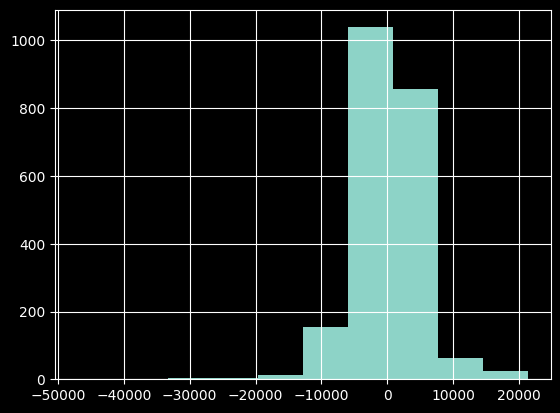

In [20]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

test["error"].hist() # Ошибка примерно занижает и завышает одинакого 

In [21]:
np.mean([-2000, 2200])

100.0

In [22]:
test["error"].mean()

270.2771885030021

# Абсолютная ошибка

In [23]:
test["error_abs"] = abs(test["error"])

In [24]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,45436.288019,-7553.711981,7553.711981
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,21738.835257,-2342.164743,2342.164743
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,16205.326279,3206.326279,3206.326279
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32088.707415,20093.707415,20093.707415
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,32088.707415,2213.707415,2213.707415
...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,19357.530409,4358.530409,4358.530409
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,44808.449332,15132.449332,15132.449332
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,28444.115709,-2125.884291,2125.884291
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,16205.326279,1206.326279,1206.326279


<Axes: >

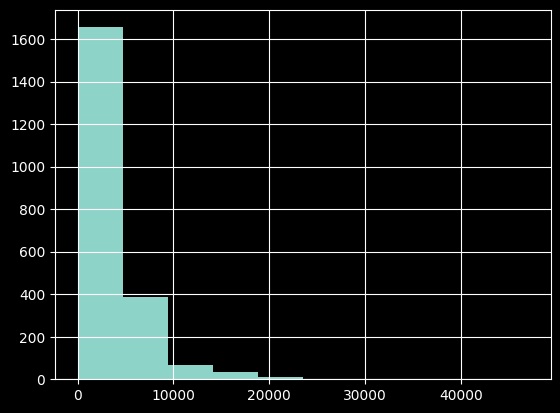

In [25]:
test["error_abs"].hist()

In [26]:
test["error_abs"].describe()

count     2157.000000
mean      3366.679482
std       3594.772258
min          0.651987
25%       1032.607772
50%       2387.530409
75%       4519.830540
max      47063.781450
Name: error_abs, dtype: float64

In [27]:
test.sort_values("error_abs", ascending=False).head(10) # Топ 10 жестких ошибок модели 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
9828,i8,2019,72000,Automatic,176,Hybrid,135,141.2,1.5,24936.218550,-47063.781450,47063.781450
809,X7,2019,74990,Semi-Auto,9200,Diesel,145,31.4,3.0,45436.288019,-29553.711981,29553.711981
2940,i8,2015,42890,Automatic,43102,Hybrid,0,134.5,1.5,14128.841329,-28761.158671,28761.158671
3100,X7,2019,74140,Semi-Auto,3300,Diesel,145,33.6,3.0,45436.288019,-28703.711981,28703.711981
7044,X7,2019,69995,Semi-Auto,5283,Diesel,145,33.6,3.0,45436.288019,-24558.711981,24558.711981
6215,M4,2018,53999,Semi-Auto,8725,Petrol,145,33.6,3.0,30196.022486,-23802.977514,23802.977514
6746,X7,2019,68720,Semi-Auto,5000,Diesel,145,33.6,3.0,45436.288019,-23283.711981,23283.711981
1904,1 Series,2019,23997,Semi-Auto,8423,Petrol,145,39.8,3.0,45436.288019,21439.288019,21439.288019
6210,2 Series,2020,29500,Semi-Auto,10,Petrol,145,39.8,3.0,50475.467460,20975.467460,20975.467460
6965,X3,2020,52991,Semi-Auto,4360,Hybrid,135,5.5,2.0,32088.707415,-20902.292585,20902.292585


# Анализ абсолютной ошибки


In [28]:
# Похоже модель ошибается на дорогих моделях

In [29]:
test["price_group"] = pd.qcut(test["price"], 5)

In [30]:
t = test.groupby("price_group")[["error_abs", "error"]].agg(["count", "mean"])

In [31]:
t # Далее уберем мулти индекс 

error_abs              error             
                        count         mean count         mean
price_group                                                  
(1199.999, 13995.0]       435  1946.501392   435  1455.253316
(13995.0, 18500.0]        432  2226.887346   432   935.257732
(18500.0, 23131.6]        427  2862.599075   427   871.253539
(23131.6, 29990.0]        432  3449.633506   432   925.566990
(29990.0, 74990.0]        431  6358.730219   431 -2844.428857

In [32]:
t.columns = ["_".join(col).strip() for col in t.columns.values]

In [33]:
t

,error_abs_count,error_abs_mean,error_count,error_mean
price_group,,,,
"(1199.999, 13995.0]",435,1946.501392,435,1455.253316
"(13995.0, 18500.0]",432,2226.887346,432,935.257732
"(18500.0, 23131.6]",427,2862.599075,427,871.253539
"(23131.6, 29990.0]",432,3449.633506,432,925.566990
"(29990.0, 74990.0]",431,6358.730219,431,-2844.428857


In [34]:
t = t.drop("error_count", axis=1)

In [35]:
# Лучше всего модель ошибается на дешевых автомобилях

In [36]:
test["error_abs"].mean()

3366.679482256595

In [37]:
t["mean_error_diff"] = t["error_abs_mean"] - test["error_abs"].mean()

In [38]:
t["mean_error"] = test["error_abs"].mean()

In [39]:
t

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,1946.501392,1455.253316,-1420.178090,3366.679482
"(13995.0, 18500.0]",432,2226.887346,935.257732,-1139.792136,3366.679482
"(18500.0, 23131.6]",427,2862.599075,871.253539,-504.080407,3366.679482
"(23131.6, 29990.0]",432,3449.633506,925.566990,82.954024,3366.679482
"(29990.0, 74990.0]",431,6358.730219,-2844.428857,2992.050736,3366.679482


In [40]:
# Добавим условное форматирование 

In [41]:
import seaborn as sns
cm = sns.light_palette("red", as_cmap=True)

In [42]:
t.style.background_gradient(cmap=cm,  subset=["mean_error_diff"])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,1946.501392,1455.253316,-1420.178090,3366.679482
"(13995.0, 18500.0]",432,2226.887346,935.257732,-1139.792136,3366.679482
"(18500.0, 23131.6]",427,2862.599075,871.253539,-504.080407,3366.679482
"(23131.6, 29990.0]",432,3449.633506,925.566990,82.954024,3366.679482
"(29990.0, 74990.0]",431,6358.730219,-2844.428857,2992.050736,3366.679482


# Анализ абсолютных ошибки относительно остальных переменных 

In [43]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,45436.288019,-7553.711981,7553.711981,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,21738.835257,-2342.164743,2342.164743,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,16205.326279,3206.326279,3206.326279,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32088.707415,20093.707415,20093.707415,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,32088.707415,2213.707415,2213.707415,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,19357.530409,4358.530409,4358.530409,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,44808.449332,15132.449332,15132.449332,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,28444.115709,-2125.884291,2125.884291,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,16205.326279,1206.326279,1206.326279,"(13995.0, 18500.0]"


In [45]:
t = test.groupby("year")[["error_abs", "error"]].agg(["count", "mean"])

In [46]:
t.columns = ["_".join(col).strip() for col in t.columns.values]

In [47]:
t = t.drop("error_count", axis=1)

In [48]:
t["mean_error_diff"] = t["error_abs_mean"] - test["error_abs"].mean()

In [49]:
t["mean_error"] = test["error_abs"].mean()

In [52]:
t.style.background_gradient(cmap=cm,  subset=["mean_error_diff"])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,110.795796,110.795796,-3255.883687,3366.679482
1999,1,4905.795796,4905.795796,1539.116313,3366.679482
2001,1,3185.107419,3185.107419,-181.572063,3366.679482
2002,2,6700.000000,-3750.732096,3333.320518,3366.679482
2003,1,9673.959384,-9673.959384,6307.279902,3366.679482
2004,4,3676.915864,-1433.227234,310.236382,3366.679482
2006,3,771.506684,186.506688,-2595.172798,3366.679482
2007,2,1958.153949,1958.153949,-1408.525533,3366.679482
2008,4,679.705297,-2.545637,-2686.974186,3366.679482


In [59]:
def print_error(col):
    t = test.groupby(col)[["error_abs", "error"]].agg(["count", "mean"])
    t.columns = ["_".join(col).strip() for col in t.columns.values]
    t = t.drop("error_count", axis=1)
    t["mean_error_diff"] = t["error_abs_mean"] - test["error_abs"].mean()
    t["mean_error"] = test["error_abs"].mean()
    display(t.style.background_gradient(cmap=cm,  subset=["mean_error_diff"]))

In [60]:
print_error("year")

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,110.795796,110.795796,-3255.883687,3366.679482
1999,1,4905.795796,4905.795796,1539.116313,3366.679482
2001,1,3185.107419,3185.107419,-181.572063,3366.679482
2002,2,6700.000000,-3750.732096,3333.320518,3366.679482
2003,1,9673.959384,-9673.959384,6307.279902,3366.679482
2004,4,3676.915864,-1433.227234,310.236382,3366.679482
2006,3,771.506684,186.506688,-2595.172798,3366.679482
2007,2,1958.153949,1958.153949,-1408.525533,3366.679482
2008,4,679.705297,-2.545637,-2686.974186,3366.679482


In [65]:
print_error("transmission")

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
transmission,,,,,
Automatic,695,3599.131456,246.456477,232.451973,3366.679482
Manual,504,1942.352232,34.197433,-1424.327250,3366.679482
Semi-Auto,958,3947.375529,411.759016,580.696046,3366.679482


In [66]:
test["mileage_group"] = pd.qcut(test["mileage"], 5)

In [67]:
print_error("mileage_group")

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mileage_group,,,,,
"(0.999, 4063.2]",432,4849.158449,-250.710105,1482.478967,3366.679482
"(4063.2, 9825.4]",431,4152.321498,310.134643,785.642016,3366.679482
"(9825.4, 24299.0]",432,3086.647146,455.343471,-280.032336,3366.679482
"(24299.0, 43519.8]",430,2415.263811,-392.322079,-951.415671,3366.679482
"(43519.8, 190000.0]",432,2327.420421,1225.964686,-1039.259062,3366.679482


In [68]:
print_error("fuelType")

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
fuelType,,,,,
Diesel,1394,3288.085011,313.317488,-78.594471,3366.679482
Hybrid,64,4584.115103,-3319.343424,1217.435621,3366.679482
Other,5,4521.402775,-2771.215490,1154.723293,3366.679482
Petrol,694,3403.957863,536.768551,37.278381,3366.679482


In [69]:
# Когда мы видмс непреврывную переменную - делим ее на группы 

In [72]:
test["tax_group"] = pd.qcut(test["tax"], 5 ,duplicates="drop")

In [73]:
print_error("tax_group")

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
tax_group,,,,,
"(-0.001, 125.0]",512,1943.967289,682.111736,-1422.712193,3366.679482
"(125.0, 145.0]",1131,3983.499517,292.500461,616.820034,3366.679482
"(145.0, 150.0]",252,3855.908054,556.512188,489.228571,3366.679482
"(150.0, 580.0]",262,3013.700795,-905.772543,-352.978687,3366.679482


In [74]:
test.groupby("tax_group")[["price", "year"]].agg(["count", "mean"])

price                year             
                count          mean count         mean
tax_group                                             
(-0.001, 125.0]   512  13264.859375   512  2015.365234
(125.0, 145.0]   1131  27536.747126  1131  2018.382847
(145.0, 150.0]    252  25288.376984   252  2018.166667
(150.0, 580.0]    262  18207.576336   262  2014.118321

In [75]:
test["mpg_group"] = pd.qcut(test["mpg"], 5)

In [76]:
print_error("mpg_group")

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mpg_group,,,,,
"(5.499, 42.2]",444,4700.118491,-666.335557,1333.439009,3366.679482
"(42.2, 50.4]",487,3462.393879,330.207087,95.714397,3366.679482
"(50.4, 55.4]",380,3568.724221,224.667776,202.044738,3366.679482
"(55.4, 64.2]",449,2325.706706,523.906963,-1040.972776,3366.679482
"(64.2, 470.8]",397,2741.893449,1001.063100,-624.786033,3366.679482


<Axes: xlabel='year'>

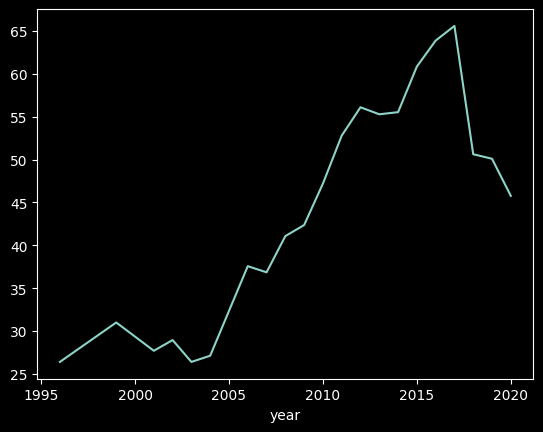

In [80]:
test.groupby("year")["mpg"].mean().plot()

In [82]:
test["engine_group"] = pd.cut(test["engineSize"], [0, 1.5, 2, float("inf")])

In [83]:
print_error("engine_group")

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
engine_group,,,,,
"(0.0, 1.5]",279,2372.465206,246.297773,-994.214276,3366.679482
"(1.5, 2.0]",1347,2735.046267,15.889509,-631.633216,3366.679482
"(2.0, inf]",524,5530.900633,919.410489,2164.221151,3366.679482


# Feature importances

In [84]:
# Возьмем старую модель

In [90]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,year,23.488530
1,engineSize,19.807654
2,mileage,17.165530
3,model,16.759884
4,mpg,13.350041
5,fuelType,4.669795
6,transmission,3.580865
7,tax,1.177701


# Shap -  Позволяет считать вклад каждой фичи в предсказание 
link https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Catboost%20tutorial.html

In [91]:
# Позволяет считать вклад каждой фичи в предсказание 

In [97]:
import shap
shap.initjs()

In [98]:
x

['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [99]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[x])

In [100]:
shap_values

array([[ 7808.59080881,  4354.13267001,  1413.88080704, ...,
         -108.93068593,  6910.9687413 ,  6308.78862733],
       [ -450.84798524,   266.21885118,   934.37812156, ...,
          -11.57654575,  -959.10971204,  -892.42207514],
       [-2525.97171415, -1986.33594499,    38.89687424, ...,
         -142.74377385,  1516.87009451,  -977.7087735 ],
       ...,
       [ 1072.70625848,  3574.41454223,   178.50820297, ...,
          110.39214559, -1004.70839706, -1291.04307733],
       [-1755.37995009, -2146.13872239,   172.3539018 , ...,
         -497.72128338, -1402.79112509,  -772.31805374],
       [-3755.06610509,  2958.37288995,   781.31045071, ...,
           26.25865747,  -422.19209775, -1128.41452459]])

In [101]:
pd.DataFrame(shap_values, columns=x)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,7808.590809,4354.132670,1413.880807,5302.692415,2659.174438,-108.930686,6910.968741,6308.788627
1,-450.847985,266.218851,934.378122,282.348620,66.329098,-11.576546,-959.109712,-892.422075
2,-2525.971714,-1986.335945,38.896874,-4590.965039,-638.874858,-142.743774,1516.870095,-977.708774
3,-3160.510248,5001.595518,759.637512,4305.410649,-1629.862014,-255.594506,6640.646174,-2280.562854
4,-236.790017,7155.708550,1023.383624,5931.463103,-1342.056624,-87.893388,1599.935382,-1711.852678
...,...,...,...,...,...,...,...,...
2152,-1673.556794,-3565.578336,75.171668,-5571.775967,308.250470,-37.002085,-606.843227,2574.355479
2153,-1566.796529,4366.855456,458.457779,2170.391672,-1348.180758,-43.702935,1129.965559,3619.837595
2154,1072.706258,3574.414542,178.508203,3969.459684,1175.906640,110.392146,-1004.708397,-1291.043077
2155,-1755.379950,-2146.138722,172.353902,-4620.301178,2072.375505,-497.721283,-1402.791125,-772.318054


In [102]:
train["price"].mean()

22768.483920841063

In [105]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], test[x].iloc[0,:])

<Axes: >

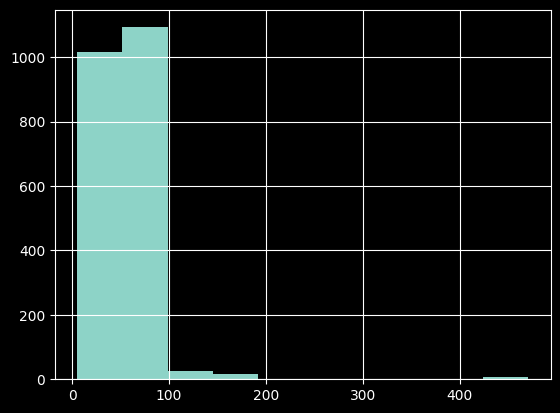

In [106]:
test["mpg"].hist()

In [107]:
(test["mpg"] < 34.9).mean()

0.06212331942512749

# Топ 10 ошибок нашей модели 

In [110]:
shap_cals=[x+"_shap" for x in x]

In [111]:
shap_cals

['model_shap',
 'year_shap',
 'transmission_shap',
 'mileage_shap',
 'fuelType_shap',
 'tax_shap',
 'mpg_shap',
 'engineSize_shap']

In [113]:
shap_val_df = pd.DataFrame(shap_values, columns=shap_cals)

In [114]:
shap_val_df

,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,7808.590809,4354.132670,1413.880807,5302.692415,2659.174438,-108.930686,6910.968741,6308.788627
1,-450.847985,266.218851,934.378122,282.348620,66.329098,-11.576546,-959.109712,-892.422075
2,-2525.971714,-1986.335945,38.896874,-4590.965039,-638.874858,-142.743774,1516.870095,-977.708774
3,-3160.510248,5001.595518,759.637512,4305.410649,-1629.862014,-255.594506,6640.646174,-2280.562854
4,-236.790017,7155.708550,1023.383624,5931.463103,-1342.056624,-87.893388,1599.935382,-1711.852678
...,...,...,...,...,...,...,...,...
2152,-1673.556794,-3565.578336,75.171668,-5571.775967,308.250470,-37.002085,-606.843227,2574.355479
2153,-1566.796529,4366.855456,458.457779,2170.391672,-1348.180758,-43.702935,1129.965559,3619.837595
2154,1072.706258,3574.414542,178.508203,3969.459684,1175.906640,110.392146,-1004.708397,-1291.043077
2155,-1755.379950,-2146.138722,172.353902,-4620.301178,2072.375505,-497.721283,-1402.791125,-772.318054


In [115]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group,engine_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,45436.288019,-7553.711981,7553.711981,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,21738.835257,-2342.164743,2342.164743,"(23131.6, 29990.0]","(9825.4, 24299.0]","(145.0, 150.0]","(55.4, 64.2]","(1.5, 2.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,16205.326279,3206.326279,3206.326279,"(1199.999, 13995.0]","(43519.8, 190000.0]","(150.0, 580.0]","(42.2, 50.4]","(1.5, 2.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32088.707415,20093.707415,20093.707415,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]","(1.5, 2.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,32088.707415,2213.707415,2213.707415,"(23131.6, 29990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(1.5, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,19357.530409,4358.530409,4358.530409,"(13995.0, 18500.0]","(43519.8, 190000.0]","(150.0, 580.0]","(50.4, 55.4]","(2.0, inf]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,44808.449332,15132.449332,15132.449332,"(23131.6, 29990.0]","(4063.2, 9825.4]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,28444.115709,-2125.884291,2125.884291,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(42.2, 50.4]","(1.5, 2.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,16205.326279,1206.326279,1206.326279,"(13995.0, 18500.0]","(43519.8, 190000.0]","(-0.001, 125.0]","(64.2, 470.8]","(1.5, 2.0]"


In [120]:
test_shap = pd.concat([test.reset_index(), shap_val_df], axis=1)

In [124]:
test_shap = test_shap.sort_values("error_abs", ascending=False)

In [125]:
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,...,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
1435,9828,i8,2019,72000,Automatic,176,Hybrid,135,141.2,1.5,...,"(64.2, 470.8]","(0.0, 1.5]",20529.432241,4465.806110,1812.173101,7292.261244,8867.532021,1596.269910,4973.312875,-1465.455055
1405,809,X7,2019,74990,Semi-Auto,9200,Diesel,145,31.4,3.0,...,"(5.499, 42.2]","(2.0, inf]",13081.021829,5258.847878,1819.318483,2250.260371,6271.229186,-148.091191,15594.898541,5478.856605
1698,2940,i8,2015,42890,Automatic,43102,Hybrid,0,134.5,1.5,...,"(64.2, 470.8]","(0.0, 1.5]",15922.024230,-3769.636095,1229.903616,-3820.809636,5601.128587,915.888653,3938.330811,-124.215212
1526,3100,X7,2019,74140,Semi-Auto,3300,Diesel,145,33.6,3.0,...,"(5.499, 42.2]","(2.0, inf]",12237.285622,4057.542840,1665.662092,5619.696097,4263.572489,-137.412397,11766.033419,6132.273615
1337,7044,X7,2019,69995,Semi-Auto,5283,Diesel,145,33.6,3.0,...,"(5.499, 42.2]","(2.0, inf]",12178.202733,4522.561231,1773.131885,4570.923044,4266.583740,-197.487709,12120.860223,6103.693282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,6803,X2,2019,27806,Semi-Auto,2198,Petrol,145,36.2,2.0,...,"(5.499, 42.2]","(1.5, 2.0]",3534.978919,2908.589330,1031.868604,3570.916266,-1467.155461,-265.082401,1315.273634,-3282.081678
201,4618,3 Series,2015,14247,Automatic,51650,Diesel,145,56.5,2.0,...,"(55.4, 64.2]","(1.5, 2.0]",-1072.489092,-3253.605167,128.145944,-3640.844099,322.499773,213.489983,-835.293852,-655.467038
1721,4712,2 Series,2019,24950,Automatic,5042,Hybrid,135,113.0,1.5,...,"(64.2, 470.8]","(0.0, 1.5]",-4009.123399,3284.551611,249.746016,3453.348550,2624.444115,315.082305,-731.172056,-2757.429135
297,6969,X2,2018,21726,Semi-Auto,5000,Diesel,145,50.4,2.0,...,"(42.2, 50.4]","(1.5, 2.0]",3631.611281,-80.243102,870.007364,2793.168215,-241.720408,-172.124602,-1449.075548,-2489.815672


In [126]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cals].values[0,:], test_shap[x].iloc[0,:])

In [128]:
pd.options.display.max_columns=100

In [129]:
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
1435,9828,i8,2019,72000,Automatic,176,Hybrid,135,141.2,1.5,24936.218550,-47063.781450,47063.781450,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(64.2, 470.8]","(0.0, 1.5]",20529.432241,4465.806110,1812.173101,7292.261244,8867.532021,1596.269910,4973.312875,-1465.455055
1405,809,X7,2019,74990,Semi-Auto,9200,Diesel,145,31.4,3.0,45436.288019,-29553.711981,29553.711981,"(29990.0, 74990.0]","(4063.2, 9825.4]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]",13081.021829,5258.847878,1819.318483,2250.260371,6271.229186,-148.091191,15594.898541,5478.856605
1698,2940,i8,2015,42890,Automatic,43102,Hybrid,0,134.5,1.5,14128.841329,-28761.158671,28761.158671,"(29990.0, 74990.0]","(24299.0, 43519.8]","(-0.001, 125.0]","(64.2, 470.8]","(0.0, 1.5]",15922.024230,-3769.636095,1229.903616,-3820.809636,5601.128587,915.888653,3938.330811,-124.215212
1526,3100,X7,2019,74140,Semi-Auto,3300,Diesel,145,33.6,3.0,45436.288019,-28703.711981,28703.711981,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]",12237.285622,4057.542840,1665.662092,5619.696097,4263.572489,-137.412397,11766.033419,6132.273615
1337,7044,X7,2019,69995,Semi-Auto,5283,Diesel,145,33.6,3.0,45436.288019,-24558.711981,24558.711981,"(29990.0, 74990.0]","(4063.2, 9825.4]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]",12178.202733,4522.561231,1773.131885,4570.923044,4266.583740,-197.487709,12120.860223,6103.693282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,6803,X2,2019,27806,Semi-Auto,2198,Petrol,145,36.2,2.0,27824.786145,18.786145,18.786145,"(23131.6, 29990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(1.5, 2.0]",3534.978919,2908.589330,1031.868604,3570.916266,-1467.155461,-265.082401,1315.273634,-3282.081678
201,4618,3 Series,2015,14247,Automatic,51650,Diesel,145,56.5,2.0,14264.044256,17.044256,17.044256,"(13995.0, 18500.0]","(43519.8, 190000.0]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",-1072.489092,-3253.605167,128.145944,-3640.844099,322.499773,213.489983,-835.293852,-655.467038
1721,4712,2 Series,2019,24950,Automatic,5042,Hybrid,135,113.0,1.5,24936.218550,-13.781450,13.781450,"(23131.6, 29990.0]","(4063.2, 9825.4]","(125.0, 145.0]","(64.2, 470.8]","(0.0, 1.5]",-4009.123399,3284.551611,249.746016,3453.348550,2624.444115,315.082305,-731.172056,-2757.429135
297,6969,X2,2018,21726,Semi-Auto,5000,Diesel,145,50.4,2.0,21738.835257,12.835257,12.835257,"(18500.0, 23131.6]","(4063.2, 9825.4]","(125.0, 145.0]","(42.2, 50.4]","(1.5, 2.0]",3631.611281,-80.243102,870.007364,2793.168215,-241.720408,-172.124602,-1449.075548,-2489.815672


In [131]:
print_error("model")

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
model,,,,,
1 Series,381,2579.462995,1552.146995,-787.216487,3366.679482
2 Series,237,2912.657965,2093.455183,-454.021518,3366.679482
3 Series,499,2874.278145,1518.960640,-492.401337,3366.679482
4 Series,203,4083.249430,2054.184110,716.569948,3366.679482
5 Series,216,2882.408259,229.920443,-484.271223,3366.679482
6 Series,17,2089.479056,403.114883,-1277.200427,3366.679482
7 Series,19,4394.634914,-4272.168799,1027.955432,3366.679482
8 Series,4,10159.965420,-10159.965420,6793.285938,3366.679482
M2,10,4068.691943,229.501514,702.012460,3366.679482


<Axes: >

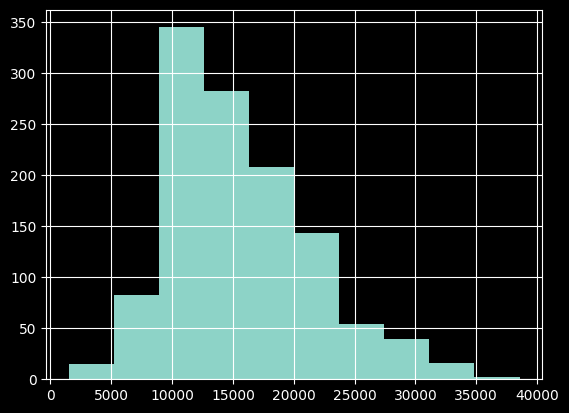

In [141]:
train[train["model"] == " 1 Series"].price.hist() # Смотрим график цены всех машин 1 серии

<Axes: >

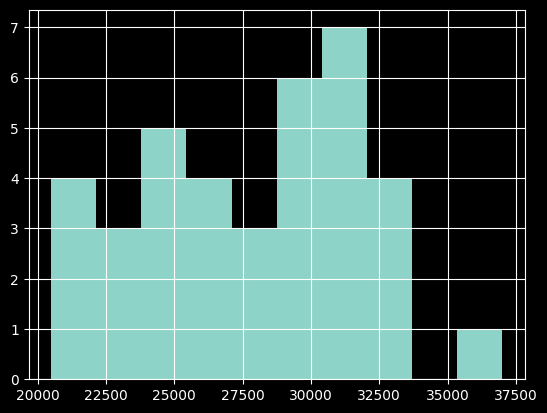

In [142]:
train[(train["model"] == " 1 Series") & (train["year"] == 2020)].price.hist() # Смотрим график цены всех машин 1 серии

In [143]:
# Если возьмем всю выборку, то найдем последнюю машину 

<Axes: >

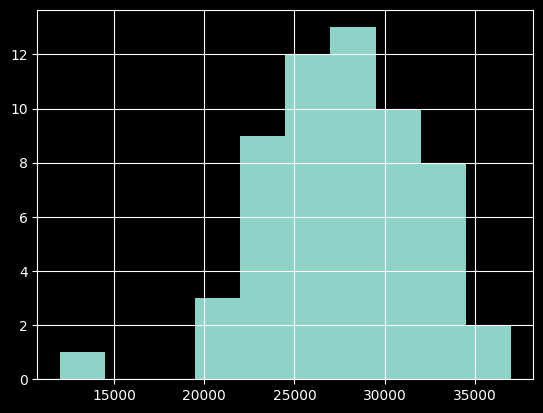

In [173]:
df[(df["model"] == " 1 Series") & (df["year"] == 2020)].price.hist() # Смотрим график цены всех машин 1 серии и 2020

In [174]:
# shap позволяет визуализировать несколько наблюдений сразу 

In [175]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                test_shap[shap_cals].head(10).values, 
                test_shap[x].head(10))

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                test_shap[shap_cals].values, 
                test_shap[x])

# Dependence plot 

In [177]:
x

['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [ ]:
shap.decision_plot("year", shap_values, test[x])

# Summury plot 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


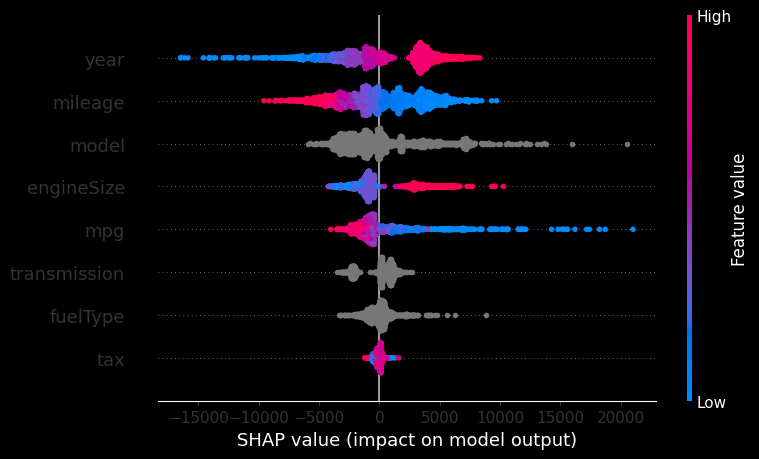

In [182]:
shap.summary_plot(shap_values, test[x])
# Серым горят категориальные фичи 
# Какое влияние оказывают категориальные переменные на модель 